# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'][:,8]           # matriz con los datos de entrada (atributos)

array([ 1.,  2.,  2.,  3.,  3.,  3.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,
        4.,  4.,  3.,  5.,  2.,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  3.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,
        2.,  4.,  4.,  4.,  2.,  2.,  2.,  2.,  2.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  3.,  3

In [5]:
 boston['target']         # vector de valores a predecir

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [8]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#X_train

((404, 13), (102, 13), (404,), (102,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

<font color='blue'>*The Boston housing prices dataset* contiene 506 registros con los siguientes 13 atributos:
- CRIM (numérica): tasa de criminalidad per cápita en la ciudad

- ZN (num.): proporción de zonas residenciales con lotes de más de 25.000 pies cuadrados

- INDUS (num.): proporción de acres (1 acre = 4046 m^2) ocupadas por negocios no minoristas en la ciudad

- CHAS (categórica): variable ficticia Charles River (= 1 si limita con el río; 0 en otro caso)

- NOX (num.): concentración de óxido nítrico (partes cada 10 millones)

- RM (num.): promedio de habitaciones por vivienda

- AGE (num.): proporción de unidades construidas antes de 1940 ocupadas por propietarios

- DIS (num.): distancia ponderada a 5 centros de empleo en Boston

- RAD (cat.): índice de accesibilidad a carreteras principales

- TAX (num.): tasa de impuestos totales a la propiedad por cada 10.000 dólares

- PTRATIO (num.): proporción de docentes-estudiantes en la ciudad

- B (num.): 1000(Bk - 0.63)^2 donde Bk es la proporción de personas negras viviendo en la ciudad

- LSTAT (num.): porcentaje de población con bajos recursos

El 'target' o valor objetivo a predecir es el valor medio (en miles de dólares) de las viviendas ocupadas por sus propietarios (MEDV).

Imaginamos que los atributos más relevantes para realizar la predicción son: **RM** (noción de tamaño de la vivienda), **LSTAT** (la proporción de población de bajos recursos en cierta zona está relacionada al nivel de precios de las propiedades de esa zona), **RAD** (acceso a carreteras importantes), **NOX** (nivel de contaminación del aire), **CHAS** (distancia al Río Charles).

Consideramos que el set de datos contiene información con sesgo racista, con riesgo de segregación de población negra al incluir entre los atributos un índice que se construye con la proporción de personas negras viviendo en la zona (baja proporción de personas negras encarecerá el valor promedio de la propiedad).

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

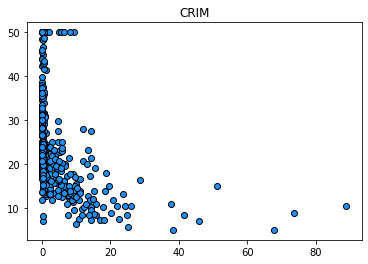

In [9]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [10]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

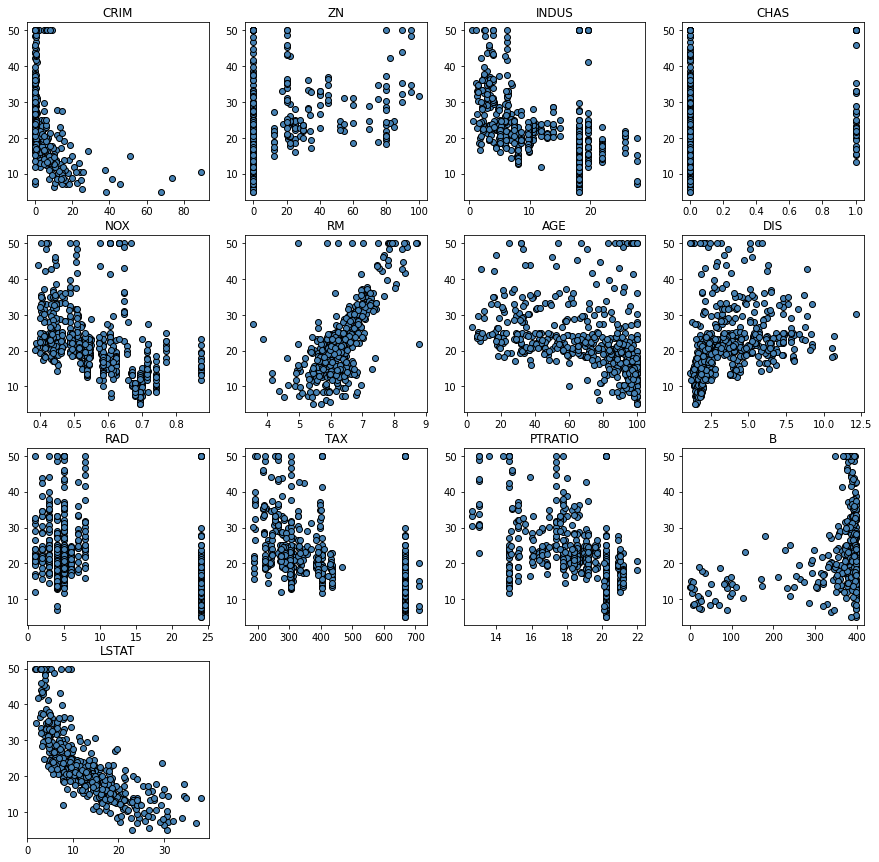

In [11]:
plt.figure(figsize=(15,15))
pos = 1
for feature in boston['feature_names']:
    ax = plt.subplot(4, 4, pos)
    plt.scatter(X[:,boston['feature_names'] == feature], y, facecolor="steelblue", edgecolor="k", label="datos")
    ax.title.set_text(feature)
    pos += 1

Viendo los gráficos que relacionan cada atributo con el objetivo a predecir, consideramos que los atributos más relevantes para realizar la predicción son: 

 - **RM**:el valor medio de una vivienda crece en forma proporcional a la cantidad de habitaciones que tiene.

 - **LSTAT**: cuanto mayor es la proporción de población de bajos recursos en una zona, los precios de las viviendas en esa zona tienden a ser menores.

 - **NOX**: en zonas con mayor nivel de contaminación del aire, el valor medio de las viviendas disminuye.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [12]:
# 1. Resolver acá. Ayuda:
feature = 'CRIM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

En lo que sigue probamos entrenar el modelo con un sólo estimador.

Si bien nos piden hacerlo con un único atributo, para poder comparar los resultados a los que llegamos, probamos hacerlo usando dos atributos distintos: por un lado usamos la variable "RM" y por otro lado lo hicimos usando "LSTAT".

En el momento de la entrega queda impreso el resultado al que llegamos con el atributo "LSTAT", para ver los resultados con el otro atributo será necesario des-comentar la primera línea (y comentar la segunda) del siguiente bloque de código.

In [13]:
#feature = 'RM'  # selecciono el atributo 'RM'
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]


X_train_f.shape, X_test_f.shape, y_train.shape

((404, 1), (102, 1), (404,))

In [14]:
y_train

array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
       20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
       20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
       35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
       32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
       15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
       25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
       20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
       11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
       20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
        9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
       15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
       21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
       24.1, 36.2, 15.7, 32.2, 13.5, 17.9, 13.3, 11

In [15]:
# 2. Instanciar y entrenar acá.

def linear_least_squares(X1, y1):
    X_b = np.stack((X1[:,0], np.ones(X1.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y1))

In [16]:
w = linear_least_squares(X_train_f, y_train)
w

array([-0.95648761, 34.76519272])

In [17]:
def f(X1, w1):
    X_b = np.stack((X1, np.ones(X1.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w1)

In [18]:
X_train_f.min(), y_train.min(),  X_train_f.max(), y_train.max()

(1.73, 5.0, 36.98, 50.0)

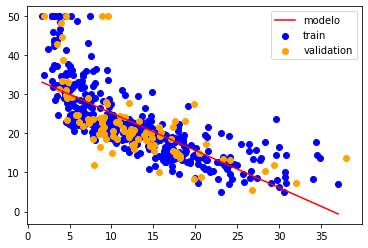

In [19]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
a= np.linspace(X_train_f.min(), X_train_f.max())
plt.plot(a, f(a, w), color="red", label="modelo")
plt.scatter(X_test_f, y_test, color="orange", label="validation")
plt.legend()
plt.show()

In [20]:
#Calculamos los valores de la prediccion

y_train_pred = f(X_train_f[:, 0], w)
y_val_pred = f(X_test_f[:, 0], w)

y_train_pred.shape, y_val_pred.shape

((404,), (102,))

In [21]:
#Calculamos el error cuadratico medio de la prediccion

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 36.523966
Val error: 46.336305


**CONCLUSIONES** <br>
Aplicamos el modelo de regresión lineal a dos features distintas. Primero usamos "RM" (cantidad de habitaciones) obteniendo un error cuadrático medio en el entrenamiento de 42.82 y en el conjunto de validación de 46.90. Luego aplicamos el modelo usando "LSTAT" (proporción de personas de bajos recursos) para predecir "MEDV" resultando un error cuadrático medio en el entrenamiento de 36.52 y en el conjunto de validación de 46.33.

Comparando estos resultados vemos que el error de entrenamiento es menor en el segundo caso mientras que el error de validación es el mismo en ambos casos, es decir, el modelo se ajusta mejor a los datos de entrenamiento en el segundo caso, pero **la performance del modelo es mala ya que el error que se comete en la predicción (en ambos casos) es grande**.

Entendemos que el método de regresión lineal es un estimador básico, seguramente mejoraremos la precisión usando un método de regresión polinomial, aumentando el grado del polinomio.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [22]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [23]:
#Lo hacemos para varios grados distintos
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [24]:
train_errors, val_errors

([85.1437202235075,
  36.52396640695966,
  28.18917233416823,
  26.78484649674975,
  25.84943285886594,
  25.034962537749603,
  25.014028004243542,
  25.01353497094333,
  24.84582298356287,
  24.825939935649917],
 [81.58231743908232,
  46.336305360025946,
  38.8468686617073,
  37.224242268440385,
  34.70486859830834,
  34.834708181336396,
  34.32620655264876,
  34.26108257555098,
  36.41528535962148,
  34.91600456401141])

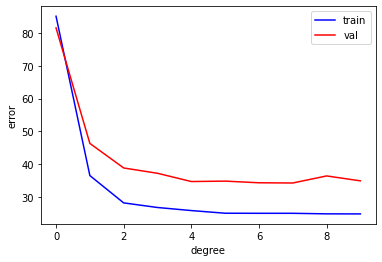

In [25]:
# 2. Graficar curvas de error acá.
#Graficamos errores de entrenamiento y validacion
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Vemos que a mayor grado del polinomio, disminuye el error de entrenamiento pero aumenta el error de validación, esto podría estar indicando un sobreajuste del modelo a nuestros datos.

In [26]:
# 4. Reconstruir mejor modelo acá y graficar.

#El mejor modelo puede ser grado 2, grado 3 o grado 4:
train_errors[3], val_errors[3], train_errors[4], val_errors[4], train_errors[5], val_errors[5]

(26.78484649674975,
 37.224242268440385,
 25.84943285886594,
 34.70486859830834,
 25.034962537749603,
 34.834708181336396)

In [27]:
#Mejor modelo grado 2 (para RM), grado 3 (para LSTAT):
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) 
model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

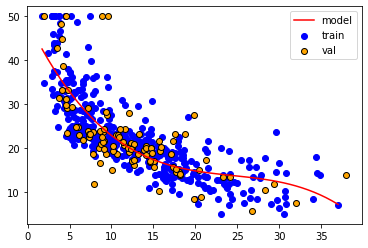

In [28]:
#Graficamos el modelo junto a los datos de entrenamiento y validacion
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.plot(a, model.predict(a.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_test_f, y_test, color="orange", edgecolor="k", label="val")
plt.legend()
plt.show()

In [29]:
y_train_pred = model.predict(X_train_f)
y_val_pred = model.predict(X_test_f)

In [30]:
#Calculamos error cuadratico medio
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 2.7e+01
Test error: 3.7e+01


**CONCLUSIONES**<br>
De la misma manera que para la regresión lineal, aplicamos el modelo a dos casos por separado:<br>
Al entrenar y predecir con la variable "RM" el modelo polinomial que mejor predice (reduce el error de entrenamiento y validación) es el polinomio de grado 2. Un grado mayor del polinomio mejora un poco el error de entrenamiento pero aumenta el error de validación, lo que nos indicaría un sobreajuste a nuestros datos y por lo tanto el de grado 2 representa el mejor modelo para generalizar la predicción.

Cuando entrenamos usando la variable "LSTAT", el modelo que mejor predice (comete menor error cuadrático al entrenar y validar) es el de grado 3. La regresión con un polinomio de grado 4 en este caso obtiene los mismos resultados en términos de error, lo que nos lleva a elegir el de grado 3 (menor cantidad de coeficientes a estimar).


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [31]:
# 1. Resolver acá. Ayuda (con dos atributos):

#Antes de empezar ¿importa si la relacion es directa o inversa?
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
#y_train_fs = (y_train, y_train)
X_train_fs.shape, X_test_fs.shape, #y_train_fs.shape

((404, 2), (102, 2))

In [32]:
# 2. Resolver acá.

#Lo hacemos para varios grados distintos
train_errors = []
val_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
models = dict()
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)

    model = make_pipeline(pf, lr) 
    model.fit(X_train_fs, y_train)
    models[degree] = model
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_val_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [33]:
train_errors, val_errors

([28.790276482053443,
  18.659453833139377,
  17.07775402237082,
  14.188503706315354,
  12.9056137301668,
  12.352155209827565,
  12.206436905281569,
  11.943062061139937,
  12.195192332382979],
 [37.383105638779945,
  28.144971863124756,
  28.567166435267858,
  33.999233405723935,
  34.20141357060207,
  34.92463965396957,
  70.25987498598042,
  545.4189865207986,
  1104.384443696359])

Gráfico del error cuadrático medio vs. grado del polinomio en **escala logarítmica** donde se ve que el menor error se obtiene con el polinomio de grado 2 o grado 3. Dado que a mayor grado, mayor cantidad de coeficientes a estimar, creemos que el mejor modelo será el de grado 2.

El minimo error se da con grado 2


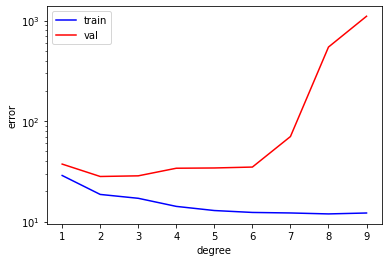

In [34]:
print(f"El minimo error se da con grado {val_errors.index(min(val_errors)) + 1}")
# 2. Graficar curvas de error acá.

#Graficamos errores de entrenamiento y validacion
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
#plt.xscale('log')
plt.ylabel("error")
plt.yscale('log')
plt.show()

In [35]:
lstat = boston['data'][:,12]
rm = boston['data'][:,5]

model = models[2]
x = np.linspace(rm.min(), rm.max(), 70) #RM
y = np.linspace(lstat.min(), lstat.max(), 70) #LSTAT
X, Y = np.meshgrid(x, y)
xy = np.vstack((X.flatten(), Y.flatten())).T
Z = model.predict(xy)

model.predict(X_train_fs)

import plotly.graph_objects as go

fig = go.Figure()

fig.add_scatter3d(x=X_train_fs[:,0], y=X_train_fs[:,1], z=y_train, mode='markers',name="Train")
fig.add_scatter3d(x=X_test_fs[:,0], y=X_test_fs[:,1], z=y_test,mode='markers',name="Validacion")
fig.add_scatter3d(x=X.flatten(), y=Y.flatten(), z = Z.flatten(), mode='markers', marker=dict(size=2, color=Z.flatten(),colorscale='Greens'), name="Model")
fig.update_layout(scene = dict(
                    xaxis_title='RM',
                    yaxis_title='LSTAT',
                    zaxis_title='PRICE'))
fig.show()

In [36]:
#imprimimos el error que se comete al aproximar con grado 2
print(f'Train error: {train_errors[1]:0.2}')
print(f'Test error: {val_errors[1]:0.2}')

Train error: 1.9e+01
Test error: 2.8e+01


**CONCLUSIONES**<br>
Al entrenar el modelo polinomial con dos atributos, elegimos "RM" y "LSTAT" (los mismos que elegimos antes por separado, ahora los consideramos en conjunto para predecir el target). Primero analizamos el grado del polinomio multivariado que mejoraba el error de entrenamiento y validación y llegamos a la conclusión de que el mejor modelo es de grado 2.

En este caso obtuvimos mejores resultados que en los ejercicios anteriores, ya que el error cuadrático medio disminuyó tanto en el entrenamiento como en la validación. 

Evidentemente, al entrenar el modelo con más de un atributo que brinda información relevante de la variable a predecir, mejora su rendimiento.

Para futuras exploraciones: sería bueno elegir otros atributos para entrenar el modelo para poder comparar resultados y analizar cuáles de los atributos disminuyen el error de validación y son más precisos a la hora de predecir el target.


## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
